# Action1_Prophet交通流量-JetRail高铁的乘客数量预测

In [2]:
import pandas as pd
# 数据加载
train = pd.read_csv('./train.csv') # index_col=0是将index列删除
train

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


In [3]:
# 转换时间格式
train['Datetime'] = pd.to_datetime(train['Datetime'], format='%d-%m-%Y %H:%M')
train

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


In [4]:
# 将日期作为train索引
train.index = train['Datetime']
train

,ID,Datetime,Count
Datetime,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2
...,...,...,...
2014-09-25 19:00:00,18283,2014-09-25 19:00:00,868
2014-09-25 20:00:00,18284,2014-09-25 20:00:00,732
2014-09-25 21:00:00,18285,2014-09-25 21:00:00,702


In [5]:
# 去掉ID、Datetime
train.drop(['ID','Datetime'], axis=1, inplace=True)
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [6]:
# 按照填进行重采样,每天的时间数量和
daily_train = train.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [7]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train['Count']
daily_train.drop(['Count'], axis=1, inplace=True)
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [8]:
daily_train

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


In [33]:
# 拟合prophet模型
from fbprophet import Prophet
# yearly_seasonality=True很可能报错，去掉也可
m = Prophet(seasonality_prior_scale=0.1,yearly_seasonality=True)

In [34]:
m.fit(daily_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
# 预测未来7个月，213天，相当于dataframe末尾加了213行
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future) # 放入时序

In [40]:
future

,ds
0,2012-08-25
1,2012-08-26
2,2012-08-27
3,2012-08-28
4,2012-08-29
...,...
970,2015-04-22
971,2015-04-23
972,2015-04-24
973,2015-04-25


In [45]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
970,2015-04-22,16510.740036,15292.357053,17753.321219
971,2015-04-23,16305.329789,14997.721155,17514.909267
972,2015-04-24,16087.477106,14812.959814,17361.724655
973,2015-04-25,14919.582161,13661.835009,16305.121907
974,2015-04-26,14750.136140,13456.277067,15942.197405


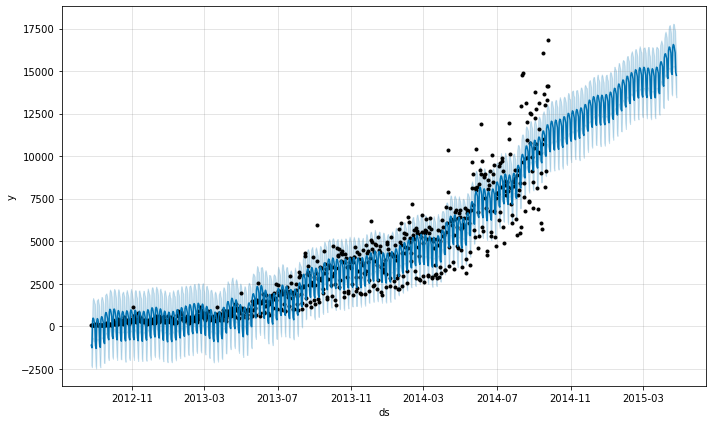

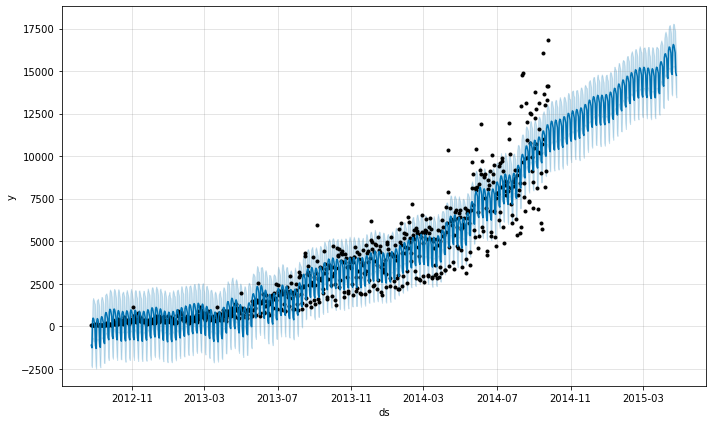

In [44]:
m.plot(forecast,ylabel='y')

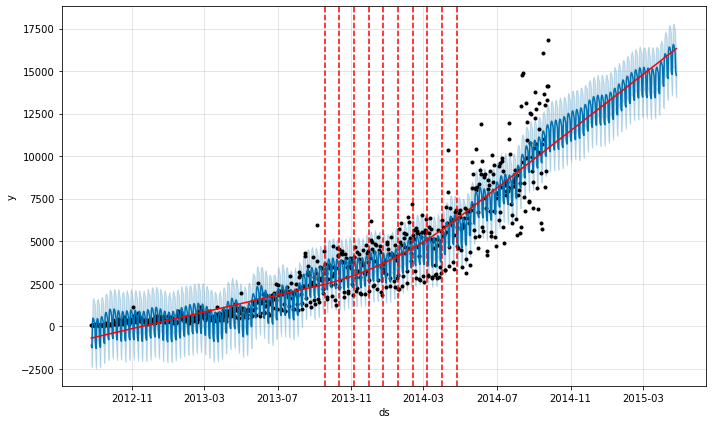

In [46]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
# plt.gca()获得当前的Axes对象ax
# 获取显著的突变点的位置
a = add_changepoints_to_plot(fig.gca(), m, forecast)
print(m)

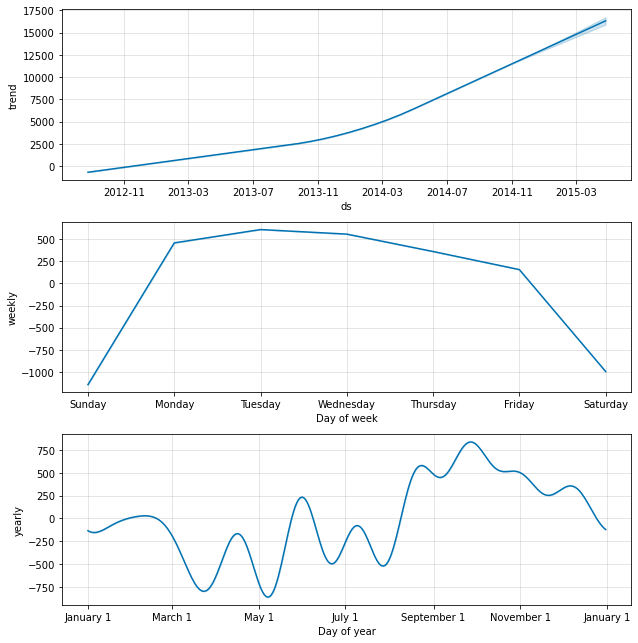

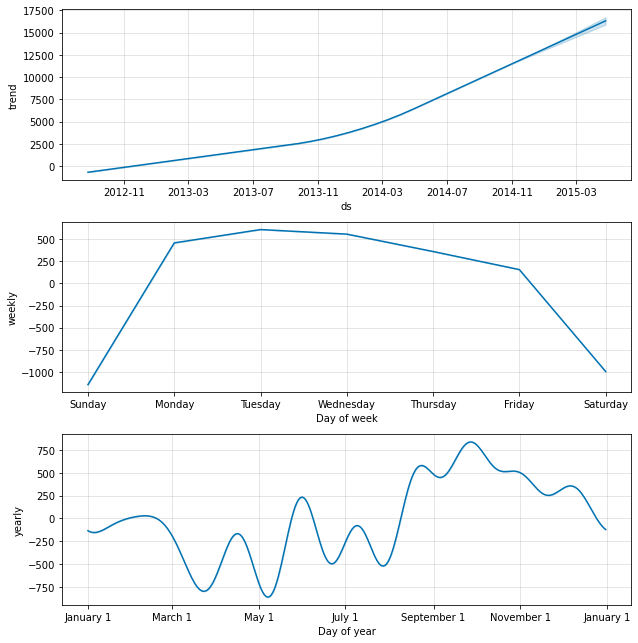

In [19]:
# 查看各个components
m.plot_components(forecast)

In [52]:
# 对节假日建模,加入节假日因素
# 将节日看成是一个正态分布，把活动期间当做波峰，lower_window 以及upper_window 的窗口作为扩散
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2008-01-13', '2009-01-03', '2010-01-16',
                        '2010-01-24', '2010-02-07', '2011-01-08',
                        '2013-01-12', '2014-01-12', '2014-01-19',
                        '2014-02-02', '2015-01-11', '2016-01-17',
                        '2016-01-24', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2010-02-07', '2014-02-02', '2016-02-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((playoffs, superbowls))

In [58]:
holidays

,holiday,ds,lower_window,upper_window
0,playoff,2008-01-13,0,1
1,playoff,2009-01-03,0,1
2,playoff,2010-01-16,0,1
3,playoff,2010-01-24,0,1
4,playoff,2010-02-07,0,1
5,playoff,2011-01-08,0,1
6,playoff,2013-01-12,0,1
7,playoff,2014-01-12,0,1
8,playoff,2014-01-19,0,1
9,playoff,2014-02-02,0,1


In [52]:
m = Prophet(holidays=holidays)
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#print(forecast)
# 通过 forecast 数据框，展示节假日效应
forecast[(forecast['playoff'] + forecast['superbowl']).abs() > 0][['ds', 'playoff', 'superbowl']][-10:]
# 可以使用 plot_forecast_component（从fbprophet.plot导入）来画出独立的节假日的成分

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,playoff,superbowl
4187,2008-01-14,83.928377,0.000000
4684,2010-01-25,83.928377,0.000000
4694,2010-02-08,83.928377,58.844052
5643,2014-01-13,83.928377,0.000000
5648,2014-01-20,83.928377,0.000000
5886,2015-01-12,83.928377,0.000000
6135,2016-01-18,83.928377,0.000000
6140,2016-01-25,83.928377,0.000000


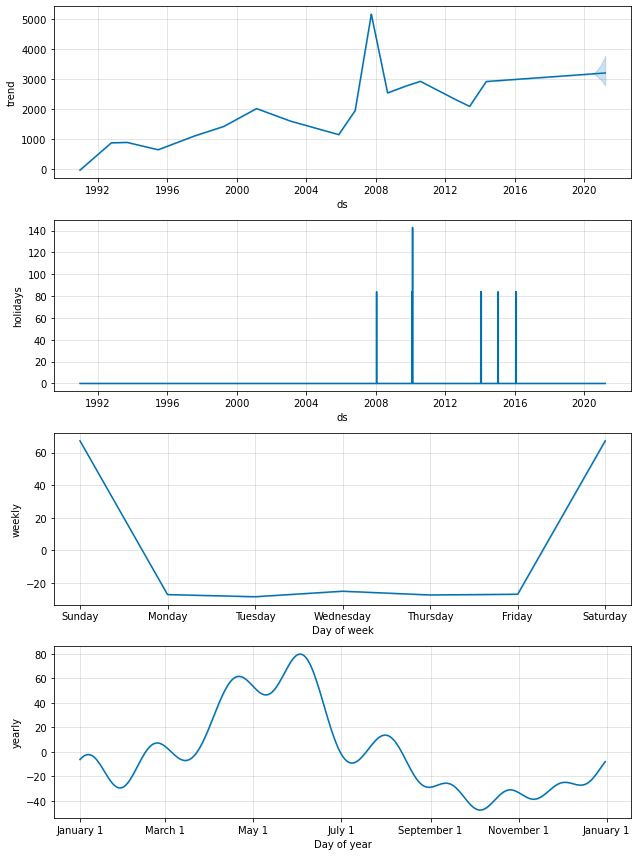

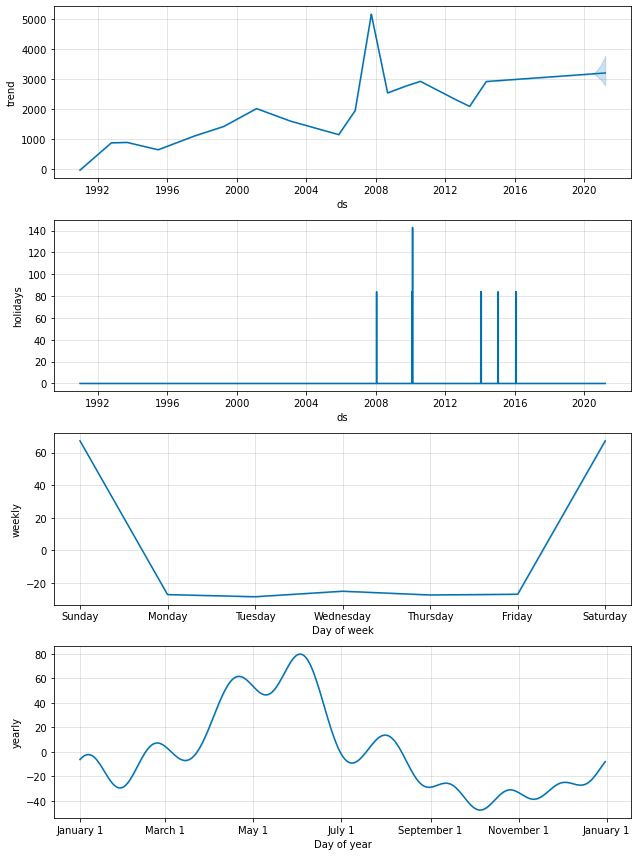

In [57]:
from fbprophet.plot import plot_components
m.plot_components(forecast, 'superbowl')

# Prophet股市预测

In [20]:
import pandas as pd
df = pd.read_csv('./shanghai_index_1990_12_19_to_2020_03_12.csv')
df

,Timestamp,Price,stock_volume,amount_volume
0,1990/12/19,99.9800,1260,494000
1,1990/12/20,104.3900,197,84000
2,1990/12/21,109.1300,28,16000
3,1990/12/24,114.5500,32,31000
4,1990/12/25,120.2500,15,6000
...,...,...,...,...
7140,2020/3/6,3034.5113,362061533,3.77E+11
7141,2020/3/9,2943.2907,414560736,4.38E+11
7142,2020/3/10,2996.7618,393296648,4.25E+11
7143,2020/3/11,2968.5174,352470970,3.79E+11


In [23]:
df.rename(columns={'Timestamp':'ds','Price':'y'},inplace=True)
df

,ds,y,stock_volume,amount_volume
0,1990/12/19,99.9800,1260,494000
1,1990/12/20,104.3900,197,84000
2,1990/12/21,109.1300,28,16000
3,1990/12/24,114.5500,32,31000
4,1990/12/25,120.2500,15,6000
...,...,...,...,...
7140,2020/3/6,3034.5113,362061533,3.77E+11
7141,2020/3/9,2943.2907,414560736,4.38E+11
7142,2020/3/10,2996.7618,393296648,4.25E+11
7143,2020/3/11,2968.5174,352470970,3.79E+11


In [24]:
from fbprophet import Prophet
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = model.make_future_dataframe(periods=90)
future

,ds
0,1990-12-19
1,1990-12-20
2,1990-12-21
3,1990-12-24
4,1990-12-25
...,...
7230,2020-06-06
7231,2020-06-07
7232,2020-06-08
7233,2020-06-09


In [27]:
# 预测未来90天
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-12-19,-35.287444,-477.819912,301.280255,-35.287444,-35.287444,-50.618611,-50.618611,-50.618611,-24.967154,-24.967154,-24.967154,-25.651457,-25.651457,-25.651457,0.0,0.0,0.0,-85.906055
1,1990-12-20,-33.911315,-459.141707,297.294409,-33.911315,-33.911315,-52.018031,-52.018031,-52.018031,-27.191043,-27.191043,-27.191043,-24.826988,-24.826988,-24.826988,0.0,0.0,0.0,-85.929346
2,1990-12-21,-32.535187,-473.888553,291.030765,-32.535187,-32.535187,-50.558418,-50.558418,-50.558418,-26.725584,-26.725584,-26.725584,-23.832834,-23.832834,-23.832834,0.0,0.0,0.0,-83.093605
3,1990-12-24,-28.406802,-472.489246,339.382278,-28.406802,-28.406802,-46.414149,-46.414149,-46.414149,-26.480472,-26.480472,-26.480472,-19.933677,-19.933677,-19.933677,0.0,0.0,0.0,-74.820951
4,1990-12-25,-27.030674,-445.900190,290.008227,-27.030674,-27.030674,-46.706177,-46.706177,-46.706177,-28.321107,-28.321107,-28.321107,-18.385070,-18.385070,-18.385070,0.0,0.0,0.0,-73.736851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7230,2020-06-06,3167.782182,2926.127576,3686.796097,3167.782182,3167.782182,144.184375,144.184375,144.184375,66.842674,66.842674,66.842674,77.341702,77.341702,77.341702,0.0,0.0,0.0,3311.966558
7231,2020-06-07,3167.893633,2912.370214,3711.745520,3167.893633,3167.893633,142.674191,142.674191,142.674191,66.842686,66.842686,66.842686,75.831505,75.831505,75.831505,0.0,0.0,0.0,3310.567823
7232,2020-06-08,3168.005083,2808.261767,3604.444683,3168.005083,3168.005083,47.492631,47.492631,47.492631,-26.480472,-26.480472,-26.480472,73.973103,73.973103,73.973103,0.0,0.0,0.0,3215.497714
7233,2020-06-09,3168.116533,2755.845132,3610.548193,3168.116533,3168.116533,43.459114,43.459114,43.459114,-28.321107,-28.321107,-28.321107,71.780221,71.780221,71.780221,0.0,0.0,0.0,3211.575647


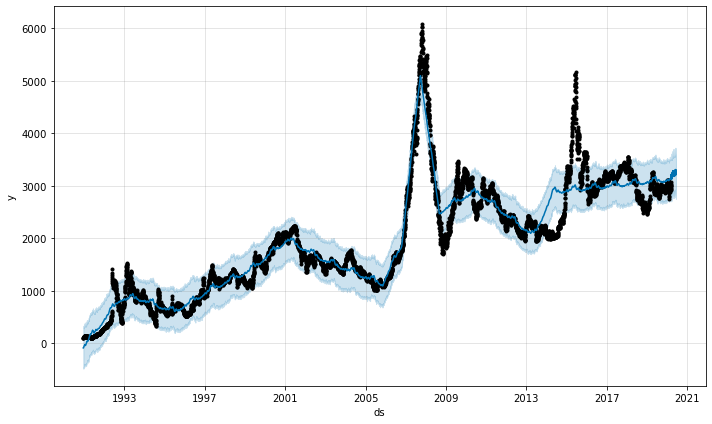

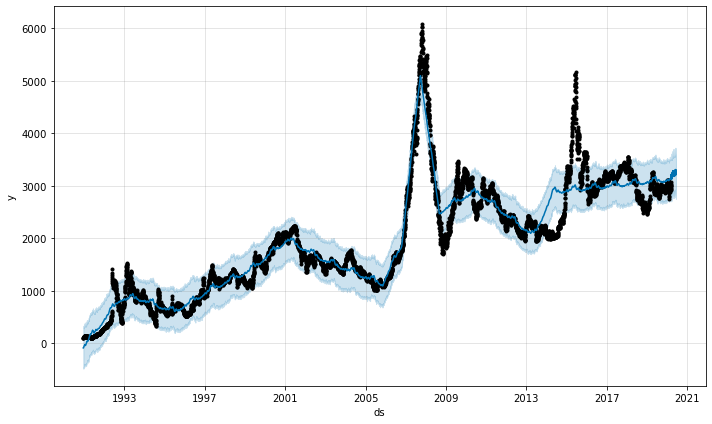

In [28]:
model.plot(forecast)

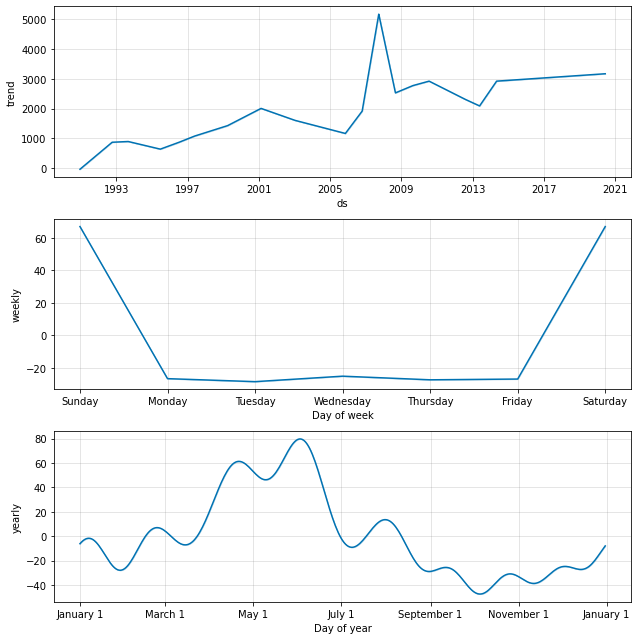

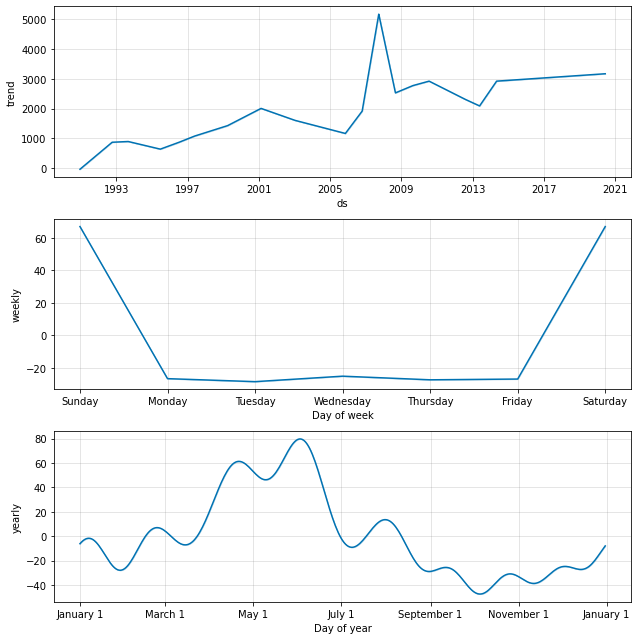

In [29]:
model.plot_components(forecast)

In [30]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
7230,2020-06-06,3167.782182,2926.127576,3686.796097,3167.782182,3167.782182,144.184375,144.184375,144.184375,66.842674,66.842674,66.842674,77.341702,77.341702,77.341702,0.0,0.0,0.0,3311.966558
7231,2020-06-07,3167.893633,2912.370214,3711.745520,3167.893633,3167.893633,142.674191,142.674191,142.674191,66.842686,66.842686,66.842686,75.831505,75.831505,75.831505,0.0,0.0,0.0,3310.567823
7232,2020-06-08,3168.005083,2808.261767,3604.444683,3168.005083,3168.005083,47.492631,47.492631,47.492631,-26.480472,-26.480472,-26.480472,73.973103,73.973103,73.973103,0.0,0.0,0.0,3215.497714
7233,2020-06-09,3168.116533,2755.845132,3610.548193,3168.116533,3168.116533,43.459114,43.459114,43.459114,-28.321107,-28.321107,-28.321107,71.780221,71.780221,71.780221,0.0,0.0,0.0,3211.575647
7234,2020-06-10,3168.227983,2822.801137,3621.873360,3168.227983,3168.227983,44.303795,44.303795,44.303795,-24.967154,-24.967154,-24.967154,69.270948,69.270948,69.270948,0.0,0.0,0.0,3212.531778
